In [74]:
import pandas as pd                    #gestionar dataframes
import numpy as np  
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.preprocessing import OneHotEncoder

In [75]:
df = pd.read_csv('/content/performance_clean.csv')

In [76]:
df.dtypes

customerid            object
systemloanid           int64
loannumber             int64
loanamount           float64
termdays              object
good_bad_flag         object
interest             float64
loan_interval          int64
interest_interval     object
dtype: object

In [88]:
X = df.drop(columns=['customerid'] + ['systemloanid'])
y = df['good_bad_flag']

One Hot Encoding

In [89]:
categorical_vars = set(X.columns[X.dtypes == object])
numerical_vars = set(X.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)

In [90]:
print(categorical_vars)
print(numerical_vars)

['interest_interval', 'termdays', 'good_bad_flag']
['loanamount', 'loannumber', 'interest', 'loan_interval']


In [91]:
#Hacemos one hot encoding
ohe = OneHotEncoder(sparse = False)
ohe_fit = ohe.fit(X[categorical_vars])
X_ohe = pd.DataFrame(ohe.fit_transform(X[categorical_vars]))
X_ohe.columns = pd.DataFrame(ohe_fit.get_feature_names())

In [92]:
#Pegamos las variables numéricas
X = pd.concat((X_ohe, X[numerical_vars].reset_index()), axis=1)

In [93]:
#Comprobamos que no tenemos variables categóricasç
X.dtypes

(x0_3000,)             float64
(x0_mas de 3000,)      float64
(x0_menos de 3000,)    float64
(x1_30,)               float64
(x1_Other,)            float64
(x2_Bad,)              float64
(x2_Good,)             float64
index                    int64
loanamount             float64
loannumber               int64
interest               float64
loan_interval            int64
dtype: object

In [94]:
X=X.drop(columns=['index'])

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [96]:
print(np.mean(X))
print(np.var(X))

-5.204391402429506e-18
0.9090909090909093


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
print(np.mean(X_train))
print(np.var(X_train))

-0.0013456476539092075
0.9054305432654398


In [99]:
from sklearn.decomposition import PCA

In [100]:
#PCA with all features


pca = PCA()
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

In [101]:
#returns the variance caused by each of the principal components.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[3.68872810e-01 3.06253007e-01 1.94577071e-01 6.81704607e-02
 4.53404313e-02 1.11126908e-02 5.67352873e-03 3.39415187e-31
 2.41903181e-32 2.83304261e-33 0.00000000e+00]


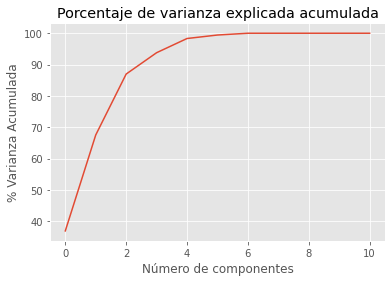

In [109]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Número de componentes")
plt.ylabel("% Varianza Acumulada")
plt.title('Porcentaje de varianza explicada acumulada')
plt.show()